In [1]:
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def read_file(path):
    for i in range(15):
        data = mne.io.read_raw_edf(path, preload = True)
        data.set_eeg_reference()
        data.filter(l_freq=0.5,h_freq=45)
        epochs = mne.make_fixed_length_epochs(data, duration=5,overlap=1)
        array = epochs.get_data()
        return array

In [5]:
list_of_path = ["h01.edf","h02.edf","h03.edf","h04.edf","h05.edf","h06.edf","h07.edf","h08.edf","h09.edf","h10.edf","h11.edf","h12.edf","h13.edf","h14.edf"]

In [6]:
list_data = [read_file(x) for x in list_of_path ]

Extracting EDF parameters from C:\Users\hp\Desktop\hamza massar\ml\data_eeg\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
231 matching events found
No baseline correction applied
0 projection items


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 227 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\hp\Desktop\hamza massar\ml\data_eeg\h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a cust

In [7]:
list_of_path_s = ["s01.edf","s02.edf","s03.edf","s04.edf","s05.edf","s06.edf","s07.edf","s08.edf","s09.edf","s10.edf","s11.edf","s12.edf","s13.edf","s14.edf"]

In [8]:
list_data_s = [read_file(x) for x in list_of_path_s ]

Extracting EDF parameters from C:\Users\hp\Desktop\hamza massar\ml\data_eeg\s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
211 matching events found
No baseline correction applied
0 projection items


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 227 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\hp\Desktop\hamza massar\ml\data_eeg\s09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 296249  =      0.000 ...  1184.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a cust

In [9]:
data = list_data + list_data_s

In [10]:
data_label = [len(i)*[0] for i in list_data] + [len(i)*[1] for i in list_data_s]

In [11]:
group_list = [[i]*len(j) for i,j in enumerate(data)]
len(group_list)

28

In [12]:
data_array = np.vstack(data)
label_array = np.hstack(data_label)
group_array = np.hstack(group_list)

In [13]:
data_array.shape,label_array.shape,group_array.shape

((7201, 19, 1250), (7201,), (7201,))

In [34]:
data_array = np.moveaxis(data_array,1,2)

In [35]:
data_array.shape

(7201, 19, 1250)

In [16]:
import tensorflow as tf

In [82]:
""""model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(filters=5,kernel_size=3,strides=1,input_shape=(1250, 19)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.MaxPool1D(pool_size=2,strides=2))
model.add(tf.keras.layers.Conv1D(filters=5,kernel_size=3,strides=1))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.MaxPool1D(pool_size=2,strides=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv1D(filters=5,kernel_size=3,strides=1))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.MaxPool1D(pool_size=2,strides=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv1D(filters=5,kernel_size=3,strides=1))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.AveragePooling1D(pool_size=2,strides=2))
model.add(tf.keras.layers.Conv1D(filters=5,kernel_size=3,strides=1))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))"""

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(300,activation="relu", input_dim = 228))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(20, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [83]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 300)               68700     
_________________________________________________________________
batch_normalization_9 (Batch (None, 300)               1200      
_________________________________________________________________
dense_38 (Dense)             (None, 200)               60200     
_________________________________________________________________
batch_normalization_10 (Batc (None, 200)               800       
_________________________________________________________________
dropout_16 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)             

In [85]:
model.compile('adam',loss='binary_crossentropy',metrics=["accuracy"])

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
from scipy import stats

In [43]:
def mean(x):
    return np.mean(x, axis = -1)
def std(x):
    return np.std(x, axis = -1)
def ptp(x):
    return np.ptp(x,axis=-1)
def var(x):
    return np.var(x, axis = -1)
def minim(x):
    return np.min(x, axis = -1)
def maxim(x):
    return np.max(x, axis = -1)
def argminim(x):
    return np.argmin(x, axis = -1)
def argmaxim(x):
    return np.argmax(x, axis = -1)
def rms(x):
    return np.sqrt(np.mean(x**2, axis = -1))
def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x, axis=-1)), axis = -1 )
def skewnes(x):
    return stats.skew(x, axis = -1)
def kurtosis(x):
    return stats.kurtosis(x, axis = -1)
def concat_featr(x):
    return np.concatenate((mean(x), std(x), ptp(x), var(x), minim(x), maxim(x),argminim(x), argmaxim(x), rms(x),abs_diff_signal(x),
                          skewnes(x),kurtosis(x)), axis = -1)

In [44]:
features = []
for d in data_array:
    features.append(concat_featr(d))

In [79]:
features_array = np.array(features)
features_array = StandardScaler().fit_transform(features_array)
features_array.shape

(7201, 228)

In [80]:
x_train,x_test, y_train , y_test = train_test_split(features_array,label_array, test_size = 0.2)

In [81]:
x_train.shape, x_test.shape

((5760, 228), (1441, 228))

In [86]:
epochs_hist =model.fit(x_train, y_train, epochs = 200, batch_size = 30, validation_split = 0.2)

Epoch 1/200
154/154 [==============================] - 4s 13ms/step - loss: 0.6961 - accuracy: 0.5556 - val_loss: 0.6657 - val_accuracy: 0.6302
Epoch 2/200
154/154 [==============================] - 2s 11ms/step - loss: 0.6326 - accuracy: 0.6148 - val_loss: 0.5945 - val_accuracy: 0.6953
Epoch 3/200
154/154 [==============================] - 2s 13ms/step - loss: 0.5521 - accuracy: 0.7170 - val_loss: 0.4811 - val_accuracy: 0.7734
Epoch 4/200
154/154 [==============================] - 2s 15ms/step - loss: 0.4589 - accuracy: 0.7941 - val_loss: 0.4096 - val_accuracy: 0.8090
Epoch 5/200
154/154 [==============================] - 1s 9ms/step - loss: 0.3796 - accuracy: 0.8407 - val_loss: 0.3606 - val_accuracy: 0.8498
Epoch 6/200
154/154 [==============================] - 2s 12ms/step - loss: 0.3142 - accuracy: 0.8655 - val_loss: 0.3077 - val_accuracy: 0.8811
Epoch 7/200
154/154 [==============================] - 2s 14ms/step - loss: 0.2611 - accuracy: 0.8941 - val_loss: 0.2986 - val_accuracy: 

Epoch 58/200
154/154 [==============================] - 2s 13ms/step - loss: 0.0504 - accuracy: 0.9857 - val_loss: 0.2822 - val_accuracy: 0.9115
Epoch 59/200
154/154 [==============================] - 2s 11ms/step - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.2156 - val_accuracy: 0.9236
Epoch 60/200
154/154 [==============================] - 1s 7ms/step - loss: 0.0497 - accuracy: 0.9837 - val_loss: 0.3409 - val_accuracy: 0.9089
Epoch 61/200
154/154 [==============================] - 1s 7ms/step - loss: 0.0420 - accuracy: 0.9861 - val_loss: 0.2205 - val_accuracy: 0.9306
Epoch 62/200
154/154 [==============================] - 1s 9ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.2182 - val_accuracy: 0.9288
Epoch 63/200
154/154 [==============================] - 1s 9ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.2674 - val_accuracy: 0.9158
Epoch 64/200
154/154 [==============================] - 1s 8ms/step - loss: 0.0526 - accuracy: 0.9811 - val_loss: 0.2070 - val_accurac

154/154 [==============================] - 2s 13ms/step - loss: 0.0343 - accuracy: 0.9902 - val_loss: 0.2421 - val_accuracy: 0.9314
Epoch 115/200
154/154 [==============================] - 2s 14ms/step - loss: 0.0219 - accuracy: 0.9931 - val_loss: 0.2375 - val_accuracy: 0.9418
Epoch 116/200
154/154 [==============================] - 2s 14ms/step - loss: 0.0326 - accuracy: 0.9911 - val_loss: 0.2213 - val_accuracy: 0.9366
Epoch 117/200
154/154 [==============================] - 2s 14ms/step - loss: 0.0190 - accuracy: 0.9954 - val_loss: 0.2252 - val_accuracy: 0.9410
Epoch 118/200
154/154 [==============================] - 2s 13ms/step - loss: 0.0373 - accuracy: 0.9898 - val_loss: 0.3524 - val_accuracy: 0.9184
Epoch 119/200
154/154 [==============================] - 2s 13ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.2537 - val_accuracy: 0.9366
Epoch 120/200
154/154 [==============================] - 2s 12ms/step - loss: 0.0207 - accuracy: 0.9954 - val_loss: 0.2688 - val_accuracy:

154/154 [==============================] - 2s 14ms/step - loss: 0.0172 - accuracy: 0.9954 - val_loss: 0.3323 - val_accuracy: 0.9323
Epoch 171/200
154/154 [==============================] - 1s 8ms/step - loss: 0.0241 - accuracy: 0.9935 - val_loss: 0.2329 - val_accuracy: 0.9375
Epoch 172/200
154/154 [==============================] - 1s 7ms/step - loss: 0.0169 - accuracy: 0.9959 - val_loss: 0.2196 - val_accuracy: 0.9453
Epoch 173/200
154/154 [==============================] - 1s 7ms/step - loss: 0.0201 - accuracy: 0.9941 - val_loss: 0.2296 - val_accuracy: 0.9392
Epoch 174/200
154/154 [==============================] - 1s 8ms/step - loss: 0.0209 - accuracy: 0.9946 - val_loss: 0.2281 - val_accuracy: 0.9436
Epoch 175/200
154/154 [==============================] - 1s 7ms/step - loss: 0.0162 - accuracy: 0.9959 - val_loss: 0.2191 - val_accuracy: 0.9410
Epoch 176/200
154/154 [==============================] - 1s 7ms/step - loss: 0.0157 - accuracy: 0.9959 - val_loss: 0.2258 - val_accuracy: 0.942

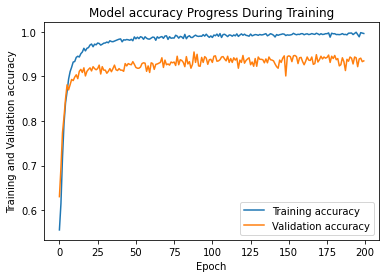

In [87]:
plt.plot(epochs_hist.history['accuracy'])
plt.plot(epochs_hist.history['val_accuracy'])
plt.title('Model accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

In [91]:
loss, accuracy = model.evaluate(x_test, y_test)
print("accuracy : ", accuracy)

46/46 [==============================] - 0s 6ms/step - loss: 0.3379 - accuracy: 0.9466
accuracy :  0.9465649127960205


In [92]:
predictions = model.predict(x=x_test) 

In [112]:
y_pred = np.array(list(map(lambda x: 1 if x>0.5 else 0,list(predictions.reshape(1441)))))

In [123]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report,plot_confusion_matrix

In [118]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[616,  23],
       [ 54, 748]], dtype=int64)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       639
           1       0.97      0.93      0.95       802

    accuracy                           0.95      1441
   macro avg       0.94      0.95      0.95      1441
weighted avg       0.95      0.95      0.95      1441

